<a href="https://colab.research.google.com/github/willclopes/Datasets/blob/main/_1_Analise_Exploratoria_de_Dados_Um_Guia_Para_Iniciantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados: um guia para iniciantes

---


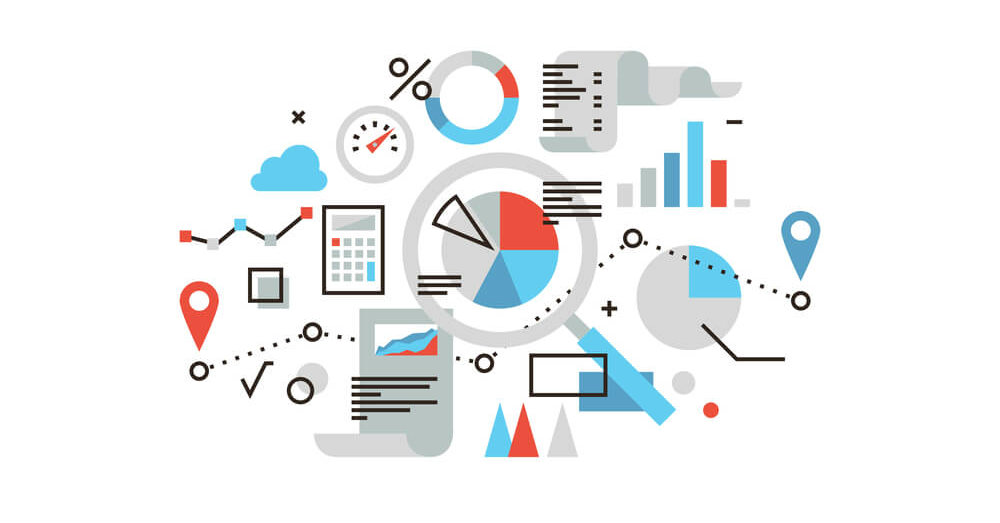

A EDA é o ponto de partida se você deseja aprender ciência de dados. Então vamos começar.

## O que é um EDA?

A análise exploratória de dados é um método para encontrar informações mais importantes e relevantes em um determinado conjunto de dados, comparando e contrastando todos os atributos dos dados (variáveis ​​independentes) individual e coletivamente, o que é útil para classificar a variável de saída.

## Por que precisamos de EDA?

O objetivo principal da EDA é auxiliar na análise de dados antes de fazer quaisquer suposições. Ela pode auxiliar na detecção de erros óbvios, bem como em um melhor entendimento dos padrões de dados, na detecção de outliers ou eventos anômalos e na descoberta entre a relação entre as variáveis.

## Conjunto de Dados


Utilizaremos um conjunto de disponibilizado no [kaggle](https://www.kaggle.com/gilsousa/habermans-survival-data-set).

Este conjunto de dados contém casos de um estudo sobre a sobrevivência de pacientes que se submeteram a cirurgia de câncer de mama no Hospital Billings da Universidade de Chicago entre 1958 e 1970


Vamos dar um passo de cada vez, primeiro entendendo o conjunto de dados e depois testando alguns gráficos diferentes para ver o que podemos aprender com eles.
1. Compreender os dados
2. O objetivo de nosso experimento
3. Análise univariada
4. Análise bivariada
5. Conclusão
6. Referências

##1. Compreender o conjunto de dados

### 1.1 Importar as bibliotecas necessárias

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### 1.2 Carregando o conjunto de dados no objeto dataframe do pandas

In [17]:

data = pd.read_csv ("haberman.csv", names = ["age", "year", "nodes", "status"])
#o shape nos diz sobre a quantidade de colunas e linhas presentes no conjunto de dados
data.shape

(306, 4)

In [18]:
data.head ()
# Isso nos dá as 5 principais linhas de dados, juntamente com os nomes de coluna 

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Existem 4 atributos neste conjunto de dados, dos quais 3 são características e 1 atributo de classe conforme abaixo. Além disso, existem 306 instâncias de dados.

1. Número de nós axilares (nós linfáticos)
2. Idade
3. Ano de Operação
4. Status de sobrevivência


Linfonodo : os linfonodos são pequenos órgãos em forma de feijão que atuam como filtros ao longo dos canais de fluido linfático. À medida que o fluido linfático sai da mama e eventualmente volta para a corrente sanguínea, os gânglios linfáticos tentam capturar e aprisionar as células cancerosas antes que elas atinjam outras partes do corpo. Ter células cancerosas nos nódulos linfáticos debaixo do braço sugere um risco aumentado de disseminação do câncer. Em nossos dados, são nódulos axilares detectados (0-52)

[Fonte](https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes )

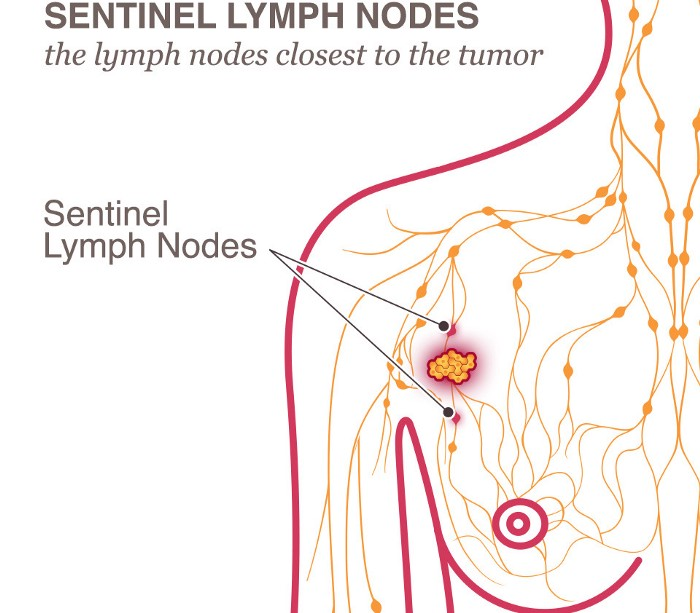

### 1.3 Descrição dos atributos
1. "Idade" - Isso nos diz a idade dos pacientes durante o tempo da operação, é um dado numérico
2. “Ano” - Diz-nos que a operação é realizada em que ano, são dados numéricos
3. “Nós” - Número de nódulos axilares positivos detectados no corpo do paciente. esses nódulos são chamados de nódulos linfáticos e estão presentes nas armas se o câncer se espalhar
4. "Status" - Isso nos diz qual é o número total de anos durante os quais o paciente sobreviveu após a operação


* As variáveis ​​de entrada em nosso conjunto de dados são Idade, Ano e Nós . Eles também são chamados de recursos através dos quais podemos analisar nossos dados.

* "Status" aqui é chamado de variável de saída / variável de classe.


In [19]:
# obter as informações sobre os atributos presentes nos dados 
data.describe ()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### 1.4 Verificar valores nulos presentes em qualquer uma das linhas

In [20]:
data.isnull().values.any()

False

Em nosso conjunto de dados, não há valores nulos. Veremos como lidar com dados que têm valores ausentes ou nulos.

In [21]:
#Para obter informações sobre o tipo de dados dos atributos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [25]:
#verificando os valores presentes na variável de status 
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

O atributo de status tem dois tipos de pontos de dados, “1” ou “2”

* 1 -> paciente sobreviveu 5 ou mais anos
* 2 -> paciente sobreviveu menos de 5 anos

## 2. O objetivo da nossa experiência

Nosso principal objetivo é usar diferentes técnicas de análise exploratória de dados, como gráficos pair plots, gráficos univariados e outros gráficos para classificar o paciente em sobrevivência (classe 1) ou não sobrevivência (classe 2) usando variáveis ​​independentes como idade, ano e nós, para que a relação entre essas variáveis ​​independentes possa ser traçada e possamos determinar quais são os fatores decisivos para nosso problema de classificação.

## 3. Análise Univariada

1. A análise univariada é um tipo de análise estatística em que apenas uma variável é usada. Essa análise nos ajuda a identificar padrões com base em um único recurso.

### 3.1 PDF (função de densidade de probabilidade)

O PDF é obtido suavizando o histograma traçado (para qualquer variável numérica) através do processo denominado KDE (estimativa de densidade do kernel)

Examinamos cada variável de entrada para ver se ela pode agregar valor ao valor de saída por conta própria. Da mesma forma, fazemos a mesma coisa para todas as variáveis ​​de entrada e vemos quais podem fornecer o valor mais alto para classificar a classe de saída como 1 (sobrevivência) ou 2 (não sobrevivência).

No gráfico PDF a seguir, o eixo x contém diferentes valores de nossa variável independente considerada e o eixo y contém a frequência / contagem do eixo x para uma determinada instância.

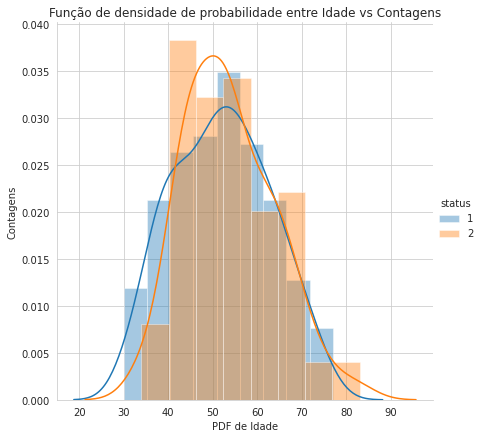

In [35]:
#PDF para idade vs contagem
sns.set_style ("whitegrid") 
age_plot = sns.FacetGrid (data, hue = "status", height = 6) 
age_plot.map (sns.distplot, 'age'). add_legend () 
plt.xlabel ("PDF de Idade") 
plt.ylabel ("Contagens") 
plt.title ("Função de densidade de probabilidade entre Idade vs Contagens") 
plt.show ()

Observações:

1. A maioria dos pontos de dados das categorias (1, 2) são sobrepostos, de modo supor que a sobrevivência do paciente não depende da idade do paciente.

2. Entre 30 e 40 anos de idade as chances de sobrevivência são maiores, entre 40 e 60 anos as chances de sobrevivência são menores.

3. Entre 60 a 75, tanto a sobrevivência quanto a não sobrevivência têm chances iguais, aproximadamente.

4. Além de 90, não há chances de sobrevivência.

5. Embora possamos inferir a partir desse atributo, não podemos concluir a sobrevivência apenas por um único parâmetro.


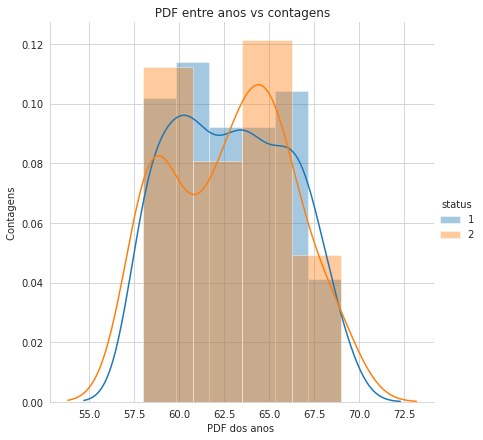

In [33]:
#PDF para o ano vs contagens
sns.set_style ("whitegrid") 
year_plot = sns.FacetGrid (data, hue = "status", height = 6) 
year_plot.map (sns.distplot, 'year'). add_legend () 
plt.xlabel ("PDF dos anos ") 
plt.ylabel (" Contagens ") 
plt.title (" PDF entre anos vs contagens ") 
plt.show ()

Observações:

1. A maior parte da região no gráfico deste ano é sobreposta por 1 e 2, portanto, este não pode ser o fator decisivo para a sobrevivência do paciente.

2. No entanto, a maioria das operações falham entre 1957 e 1965, como evidenciado pela cor marrom que representa 2 (não sobreviveu mais de 5 anos) sendo mais prevalente entre 1957 e 1965.

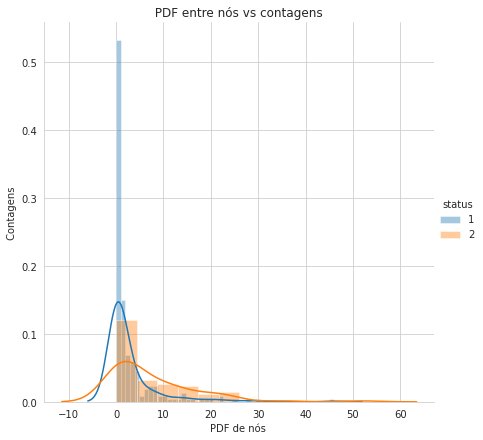

In [36]:
#PDF para nós vs contagens
sns.set_style ("whitegrid") 
nodes_plot = sns.FacetGrid (data, hue = "status", height = 6) 
nodes_plot.map (sns.distplot, 'nodes'). add_legend () 
plt.xlabel ("PDF de nós ") 
plt.ylabel (" Contagens ") 
plt.title (" PDF entre nós vs contagens ") 
plt.show ()

Observações:

1. As chances de sobrevivência são altas se nenhum dos nódulos que um determinado paciente contém for de 0 a 2

2. Se nenhum dos nós for superior a 26, então há muito menos chances de sobrevivência

## BoxPlot

Um gráfico de caixa é um método para representar grupos de dados numéricos por meio de seus quartis.

A linha inferior da caixa representa o 25º percentil (denominado quartil inferior), a linha do meio representa o 50º percentil (mediana) e a linha superior representa o 75º percentil (quartil superior) dos valores traçados.

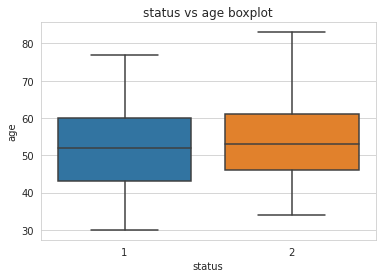

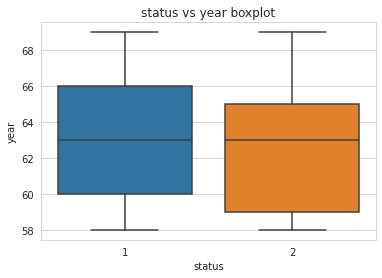

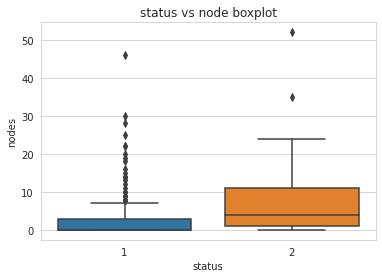

In [41]:
#BoxPlot de idade, ano e nós

sns.boxplot(x='status',y='age', data=data)
plt.title('status vs age boxplot')
plt.show()
 
sns.boxplot(x='status',y='year', data=data)
plt.title('status vs year boxplot')
plt.show()
 
sns.boxplot(x='status',y='nodes', data=data)
plt.title('status vs node boxplot')
plt.show()

Observações:

1. Para os gráficos de idade e anos, é difícil classificar, pois ambos os atributos têm a maioria dos dados em comum, por isso não podemos classificá-los perfeitamente na Classe "1" ou "2". pode-se inferir que as chances de sobrevivência antes de 1960 são muito menores e as chances de sobrevivência aumentam após 1965.

2. O gráfico de nós tem menos sobreposição em comparação com a idade e ano, onde há uma grande sobreposição e a chance de sobrevivência é principalmente concentrada se nenhum dos nós que os pacientes têm é inferior a 4.

## Gráfico de Violino

1. É uma mistura de box plot (região destacada no centro) e PDF (quando olhamos horizontalmente, pdfs simétricos podem ser vistos no lado esquerdo e direito do gráfico de violino)

2. Em um gráfico de violino, as regiões de dados mais densas são mais grossas (o que significa que há mais dados nesta região) e as regiões de dados mais esparsas são mais finas (menos quantidade de dados está presente nesta região).

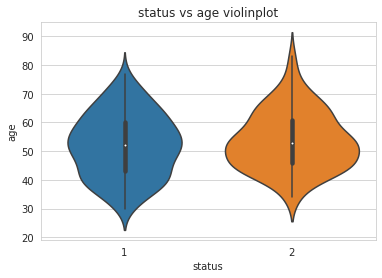

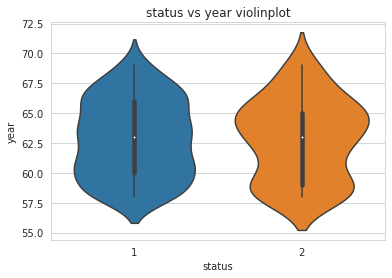

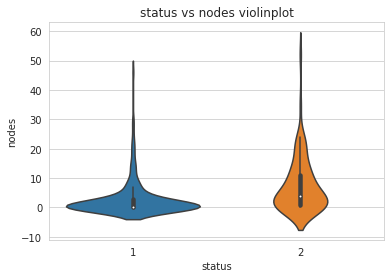

In [42]:
#Violino de idade, ano e nós

sns.violinplot(x='status',y='age',data=data)
plt.title('status vs age violinplot')
plt.show();

sns.violinplot(x='status',y='year',data=data)
plt.title("status vs year violinplot")
plt.show();

sns.violinplot(x='status',y='nodes',data=data)
plt.title('status vs nodes violinplot')
plt.show();

Observações:

Semelhante ao BoxPlot, a sobreposição em gráficos de status vs idade e status vs ano é alta e a sobreposição ainda existe no gráfico de violino de status vs nós também, portanto, não podemos classificar exatamente de acordo com o status. As observações são iguais às do bloxplot.



---


OBSERVAÇÃO (S) DE ANÁLISE GERAL UNIVARIADA (S)

1. Nenhum dos nós é indiretamente proporcional às chances de sobrevivência, pois podemos ver que quanto maior os nós, menores as chances de sobrevivência.

2. Pacientes com 1 ou zero nós sobreviveram mais e, ao mesmo tempo, existem poucas chances de não sobreviver nesta região também. Portanto, não podemos classificá-los exatamente de acordo com o status.

3. A idade por si só não pode ser o parâmetro decisivo para determinar a sobrevivência do paciente.


## 4. ANÁLISE BIVARIADA

Nesta análise, duas variáveis ​​são analisadas simultaneamente a fim de determinar a relação entre elas que pode classificar a variável de saída.

### 4.1 Gráfico de dispersão

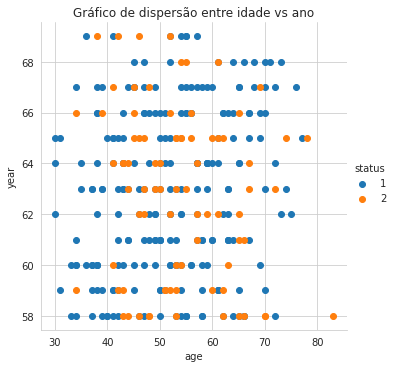

In [43]:
# Plotagem entre a idade e o ano 
sns.set_style ("whitegrid"); 
sns.FacetGrid (data, hue = "status", height = 5) .map (plt.scatter, "age", "year"). add_legend (); 
plt.title ('Gráfico de dispersão entre idade vs ano') 
plt.show ();

Observação:

Não podemos julgar a sobrevivência de um paciente com base no gráfico de idade versus ano porque os dados representados podem ser vistos como desequilibrados. No entanto, podemos ver que à medida que a idade do paciente aumenta, a aleatoriedade dos pontos de dados de status permanece a mesma, portanto, podemos plotar outros pontos de par e verificar a relação.

### 4.2 PARAR PLOTS


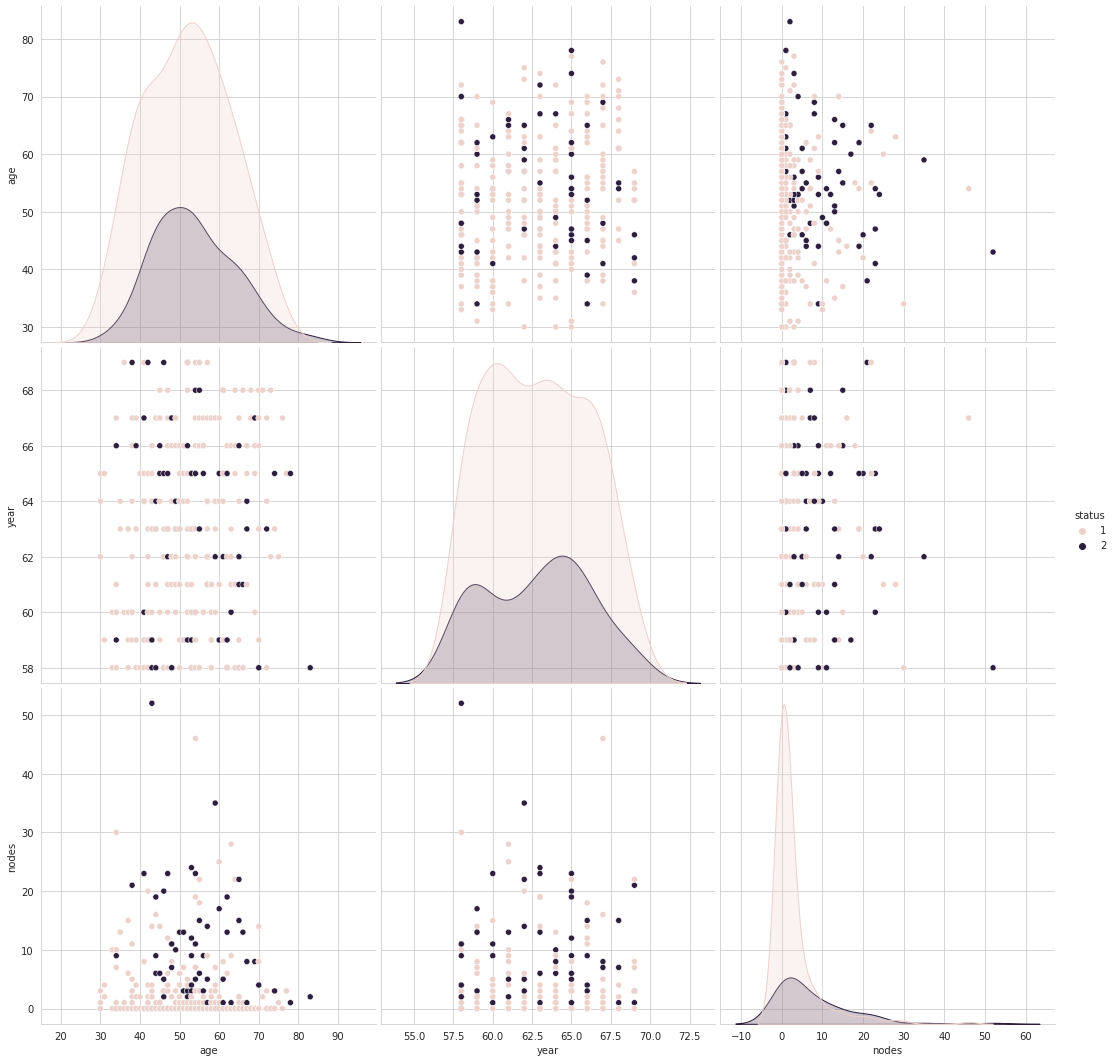

In [44]:
sns.set_style ("whitegrid") 
sns.pairplot (data, hue = "status", height = 5) 
plt.show ()

Observações:

De todos os gráficos de pares, é claro que o gráfico de pares entre Ano e nós, ou seja, gráfico 6 ou gráfico 8 é comparativamente melhor.

Todos os outros gráficos não têm muitas informações valiosas para inferir.

## 5. CONCLUSÕES


1. A classificação do status de sobrevivência do paciente que foi submetido à operação é muito difícil com os dados fornecidos, pois os dados estão desequilibrados, portanto, precisamos de dados mais equilibrados ou outros recursos que podem ajudar a obter percepções valiosas.


2. O Atributo idade não é útil para categorizar a sobrevivência dos pacientes.


3. Quanto maior o número de nós, menor a chance de sobrevivência e as chances de sobrevivência não são garantidas, mesmo quando o número de nós é muito menor ou zero. Então não podemos dizer exatamente.